# Determining Water Potability

**Introduction**

Water potability is critical for supporting populations, various industries and agricultural activities that rely on clean water for survival. Clean and drinkable water can be determined by careful analysis of certain characteristics of a sample. Using classification we hope to train a data set to be able to classify water as safe or not based on its characteristics. The question we will be asking is: Is this water sample potable based on the different levels and characteristics of it?
The data set we will be using is ‘Water Quality and Potability’. Each observation has a pH value, total solids dissolved, chloramines count, sulfate count, conductivity, organic carbon level, trihalomethanes, turbidity and potability. With these values we hope to train a classification system that can provide accurate results on potability. 


**Reading in the Data**

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(1234)

#reading the data set from the web 
url <- "https://raw.githubusercontent.com/nori-2004/data-science-group-project/main/water_potability.csv"
water <- read_csv(url)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

**Cleaning and Wrangling**

In [2]:
#changing the potable variable to a factor datatype
water<-water |> 
    mutate(Potability=as_factor(Potability))

#removing missing values 
initial_rows<-nrow(water)

water<-na.omit(water)

final_rows<-nrow(water)

removed_rows <- initial_rows - final_rows

#cleaning the data by selecting the columns we want to use
water_selected <- select(water, - Conductivity)


In [3]:
#splitting the data into testing and training sets
water_split <- initial_split(water_selected, prop = 0.75)
water_train <- training(water_split)   
water_test <- testing(water_split)

**Summary Tables**

In [4]:
#counting the number of observations that are potable and not potable

water_count<-water_train|>
    group_by(Potability)|>
    summarize(count=n())
water_count

print("number of rows removed were")
removed_rows

# Count available data for each column
available_data_counts <- map_df(water_train, ~sum(!(is.nan(.x)|is.na(.x))))
print("Available data counts (non-available data was removed)")
available_data_counts

# portable: not or able
portability_table <- table(water_train$Potability)
print("Portability table: 0 for not and 1 for able")
portability_table

# Calculate the ratio of portable vs non portable data
portability_ratio <- portability_table[2] / portability_table[1]
print("Probability ratio")
portability_ratio

# Select just the predictors
water_train_predictors = select(water_train, -Potability)

# Means of the predictors
predictor_means <- colMeans(water_train_predictors, na.rm = TRUE)
print("Means of the predictors")
predictor_means

Potability,count
<fct>,<int>
0,892
1,616


[1] "number of rows removed were"


[1] 1265

[1] "Available data counts (non-available data was removed)"


ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Potability
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1508,1508,1508,1508,1508,1508,1508,1508,1508


[1] "Portability table: 0 for not and 1 for able"



  0   1 
892 616 

[1] "Probability ratio"


1 
0.690583

[1] "Means of the predictors"


ph        Hardness          Solids     Chloramines         Sulfate 
       7.105768      195.732508    21855.236205        7.129208      334.074007 
 Organic_carbon Trihalomethanes       Turbidity 
      14.360075       66.068931        3.962126

**Graphs**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


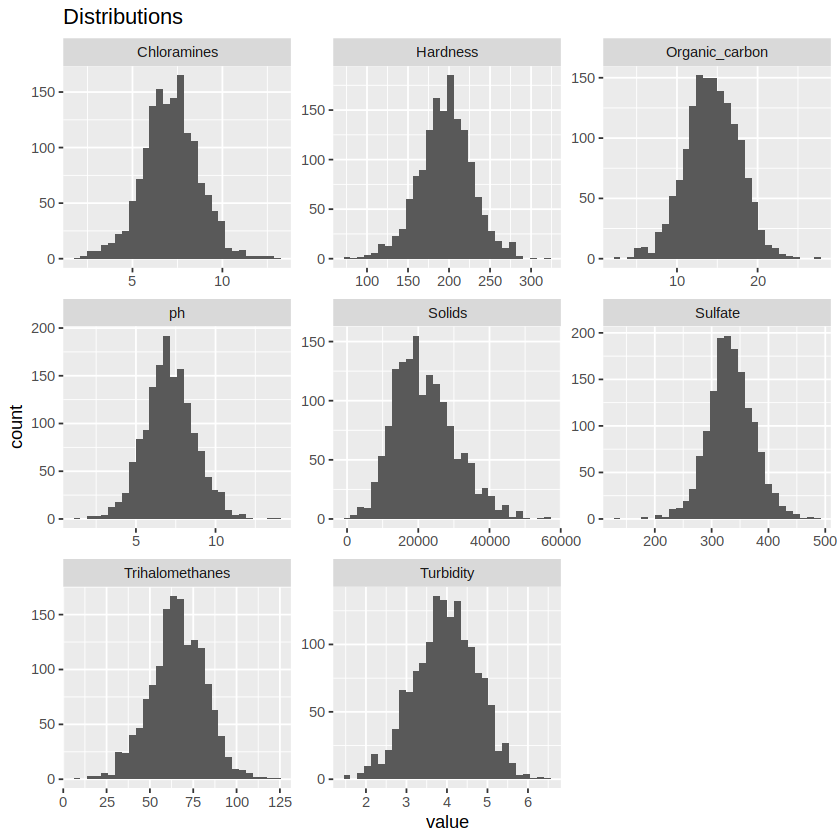

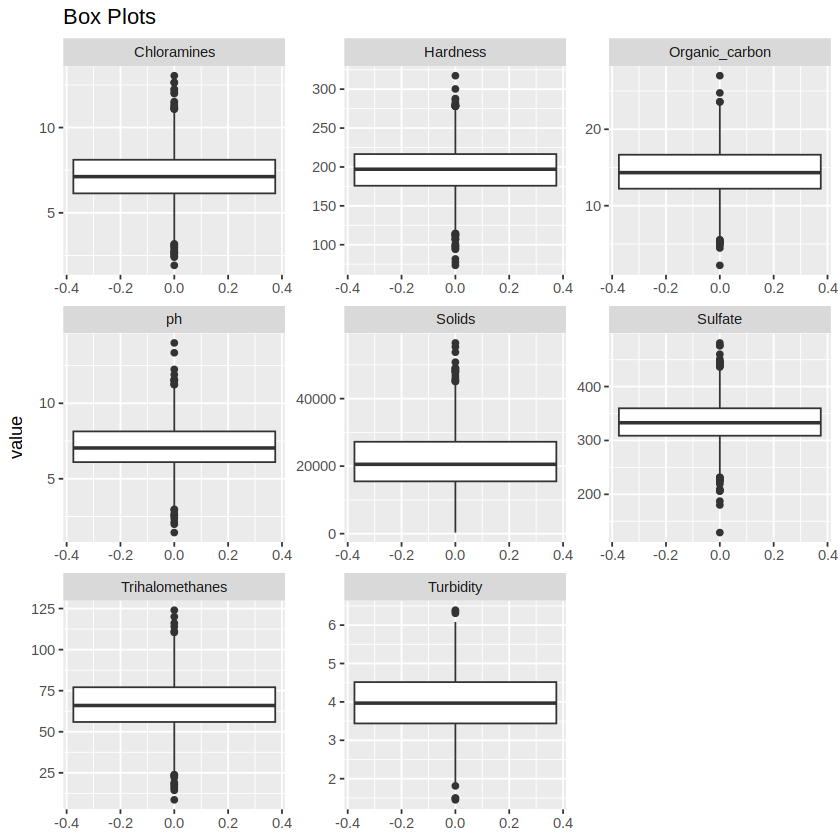

In [5]:
# Exploratory Graphs for the predictors

# Distributions
water_train_predictors |>
    gather(variable, value) |>
    ggplot(aes(x = value)) +
    geom_histogram() +
    facet_wrap(~ variable, scales = "free") +
    ggtitle("Distributions")

# Box plot (shows distribution and outliers)
water_train_predictors |>
    gather(variable, value) |>
    ggplot(aes(y = value)) +
    geom_boxplot() +
    facet_wrap(~ variable, scales = "free") +
    ggtitle("Box Plots")


**Methodology**

The problem that we have selected is a classification problem, i.e. classifying a sample of water into potable or non-potable. We will be using the K nearest neighbour classification do to so. Out of the 8 variables in our dataset, we will be using all of them as predictors besides conductivity. First, we shall prepare the data by tidying it and splitting it into training an testing sets. Then we will use cross-validation to pick the best “k” value for our dataset and then train the model using the training set, and then apply it to the testing set. This will ensure that we produce a classifier with the highest accuracy possible. Though, it would be ideal to have high precision and high recall, we shall be aiming to have a high recall with not-potable being the “positive” class. 


The best way in this case to visualize our result is to create several scatterplots using pairs of variables, this will also highlight any hidden co-relations between them. We will be experimenting with our visuals to avoid overplotting since there are over 900 observations in our data set. This will be done either by reducing the size or the transparency of the points.



**Outcomes and Significance**

We expect to find the ranges of each variable which are required for the water to be portable. Based on the strict maintenance of quality-determining variables needed for clean water, we expect a minimal range of variance between portable classified samples. Meanwhile, there is predicted to be a greater spread of data that falls in the non-portable range. 
The classification of water potability (water that is suitable for human consumption) is essential for evaluating water supplies around the world. The data model can be used to identify non-portable classified samples which can be further analyzed based on deviation from different portable water variables. This serves as a gateway to the analysis of water samples in specific industries. For instance, water samples with a higher turbidity than that of portable samples ( which indicate higher levels of microorganisms such as bacteria and parasites)  can be sent over to microbiological labs for further analysis. 
This leads to a plethora of other questions that can be explored, such as specific wastewater treatments based on the type of contamination (ie. sulfate, pH levels, etc.). Our findings could be further analyzed using calculation based questions such as the average amount of chloramines used in potable water.